In [14]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('user_review.xls')

# Display the first few rows of the dataset
print(df.head())


   id                                             review
0   1  I love this app! It is so useful and easy to use.
1   2  Terrible experience. The app crashes all the t...
2   3        Decent app but needs improvement in the UI.
3   4           Fantastic! This app has changed my life.
4   5       The app is okay, but it lacks many features.


In [15]:
# Drop rows with any null values
df.dropna(inplace=True)

# Drop unnecessary columns (if any, adjust column names based on your actual dataset)
columns_to_drop = ['user_id', 'timestamp']  # Example columns to drop, replace with actual column names if necessary
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Display the cleaned dataset
print(df.head())


   id                                             review
0   1  I love this app! It is so useful and easy to use.
1   2  Terrible experience. The app crashes all the t...
2   3        Decent app but needs improvement in the UI.
3   4           Fantastic! This app has changed my life.
4   5       The app is okay, but it lacks many features.


In [16]:
import string

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Apply preprocessing to the review column
df['review'] = df['review'].apply(preprocess_text)

# Display the preprocessed dataset
print(df.head())


   id                                            review
0   1   i love this app it is so useful and easy to use
1   2  terrible experience the app crashes all the time
2   3        decent app but needs improvement in the ui
3   4            fantastic this app has changed my life
4   5        the app is okay but it lacks many features


In [17]:
from textblob import TextBlob

def analyze_sentiment(text):
    # Analyze sentiment using TextBlob
    analysis = TextBlob(text)
    # Determine sentiment polarity
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the review column
df['sentiment'] = df['review'].apply(analyze_sentiment)

# Display the dataset with sentiment
print(df.head())


   id                                            review sentiment
0   1   i love this app it is so useful and easy to use  Positive
1   2  terrible experience the app crashes all the time  Negative
2   3        decent app but needs improvement in the ui  Positive
3   4            fantastic this app has changed my life  Positive
4   5        the app is okay but it lacks many features  Positive


sentiment
Positive    32
Negative    10
Neutral      8
Name: count, dtype: int64


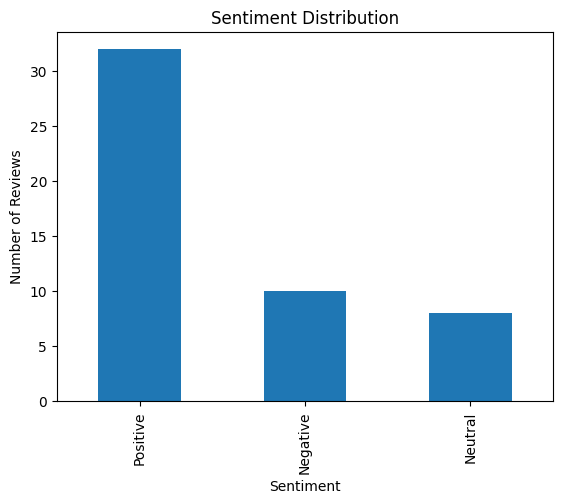

In [18]:
# Generate the summary report
sentiment_counts = df['sentiment'].value_counts()

# Display the summary report
print(sentiment_counts)

# Optionally, plot the distribution of sentiments
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution')
plt.show()
